#Scrape the list of topics from **Github**:
Created by **Amit Mondal**, Jadavpur University, BCSE 2024 Batch.

This project is a web scraping application designed to extract data from https://github.com/topics.

The scraping process is implemented in python, utilizing libraries such as requests,pandas BeautifulSoup,os.

###**Following Steps of Scraping:**

use requests to downlaod the page

user BS4 to parse and extract information

convert to a Pandas dataframe

##The Fuction of Download page:

In [1]:
import requests
from bs4 import BeautifulSoup

#Request target page and get info about target webpage
def get_topics_page():
    # TODO - add comments
    topics_url = 'https://github.com/topics'
    response = requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    doc = BeautifulSoup(response.text, 'html.parser')
    return doc

## Download Target Webpage as follows:

In [2]:
doc = get_topics_page()

##Create some helper functions to parse information from the page.

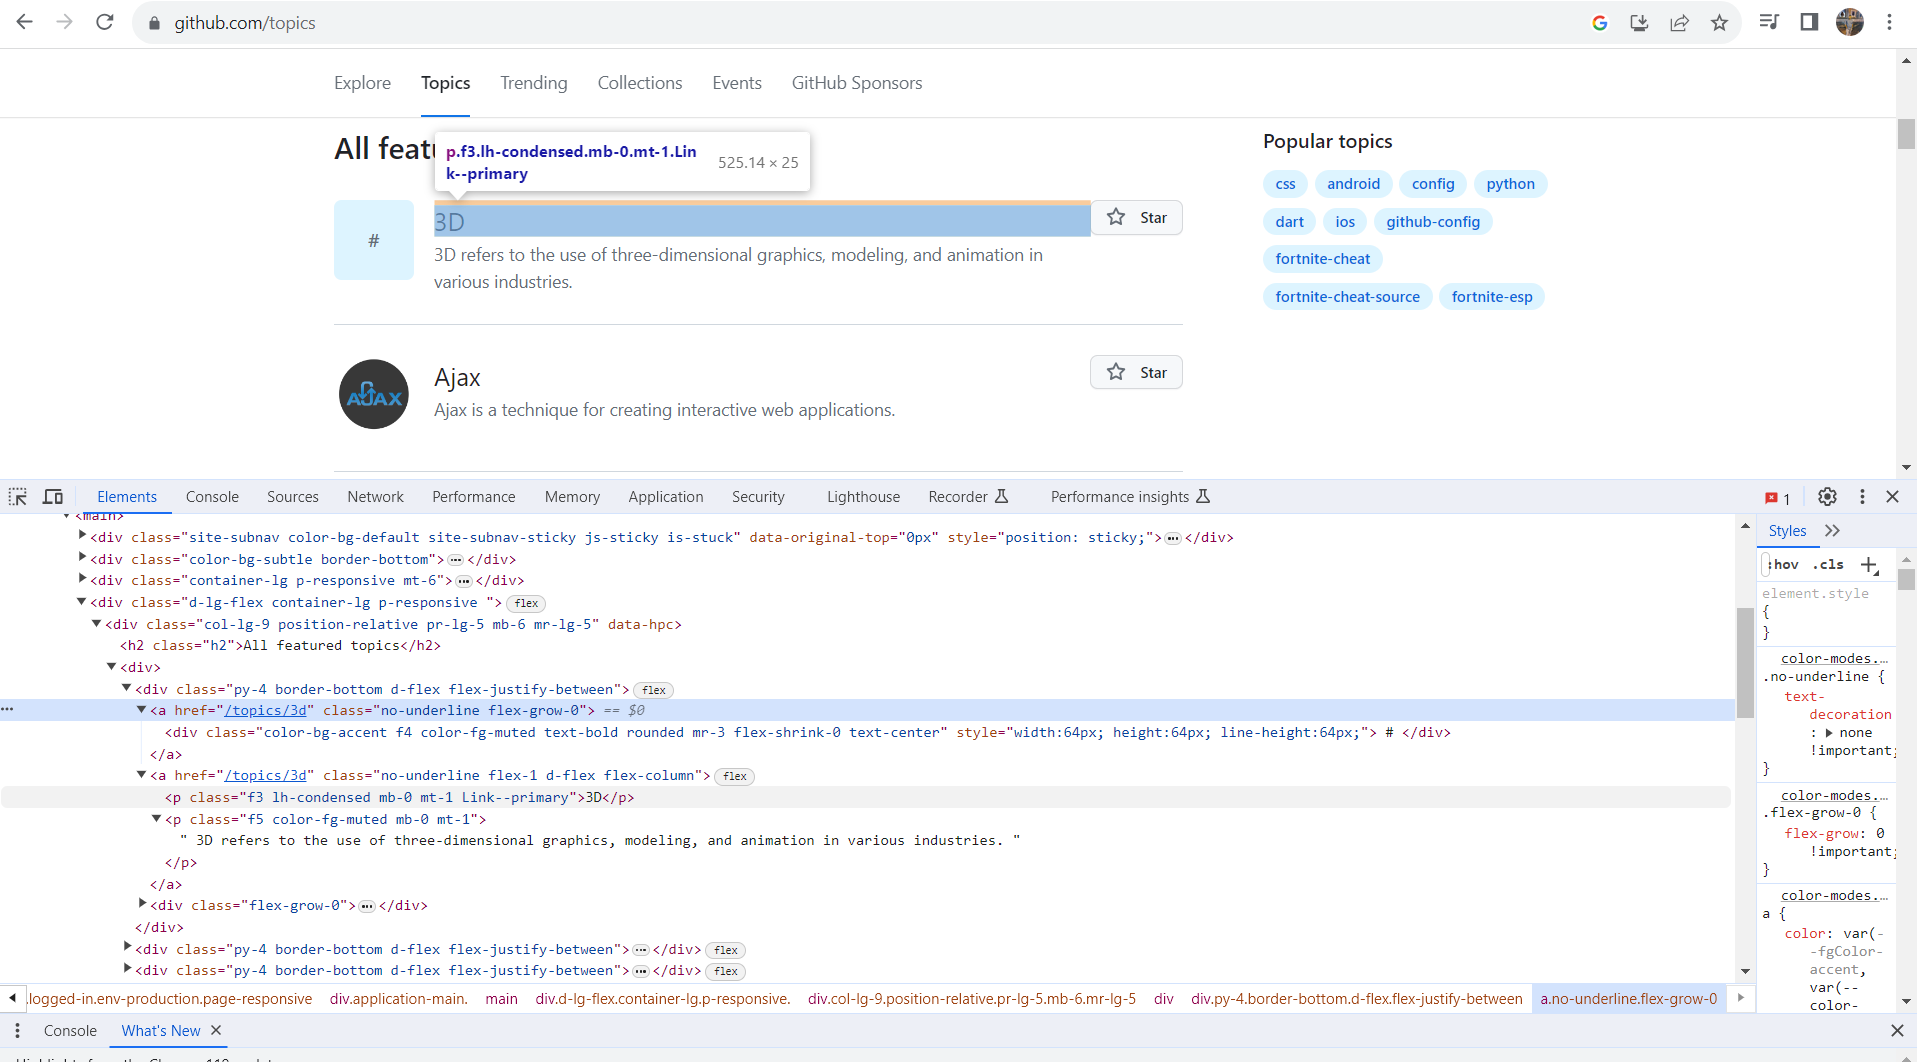

get_topic_titles can be used to get the list of titles

In [3]:
#This function helps to fetch all topic title from target webpage
def get_topic_titles(doc):
    selection_class ='f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p', {'class': selection_class})
    topic_titles = []
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles

In [4]:
titles = get_topic_titles(doc)

In [5]:
titles[:10]

['3D',
 'Ajax',
 'Algorithm',
 'Amp',
 'Android',
 'Angular',
 'Ansible',
 'API',
 'Arduino',
 'ASP.NET']

Similarly we have defined functions for descriptions and URLs.

In [6]:
#This function helps to fetch all description of topic from target webpage
def get_topic_descs(doc):
    desc_selector ='f5 color-fg-muted mb-0 mt-1'
    topic_desc_tags = doc.find_all('p', {'class': desc_selector})
    topic_descs = []
    for tag in topic_desc_tags:
        topic_descs.append(tag.text.strip())
    return topic_descs

In [7]:
#This function helps to fetch all URL of topic from target webpage
def get_topic_urls(doc):
    topic_link_tags = doc.find_all('a', {'class': 'no-underline flex-1 d-flex flex-column'})
    topic_urls = []
    base_url = 'https://github.com'
    for tag in topic_link_tags:
        topic_urls.append(base_url + tag['href'])
    return topic_urls

Let's put this all together into a single function

In [10]:
#This function helps to create dataframe of all topic info
import pandas as pd
def scrape_topics():
    topics_url = 'https://github.com/topics'
    response = requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    doc = BeautifulSoup(response.text, 'html.parser')
    topics_dict = {
        'Title': get_topic_titles(doc),
        'Description': get_topic_descs(doc),
        'URL': get_topic_urls(doc)
    }
    return pd.DataFrame(topics_dict)

In [11]:
scrape_topics()

,Title,Description,URL
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source platform for buildin...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


##Get the top 20 repositories from a topic page


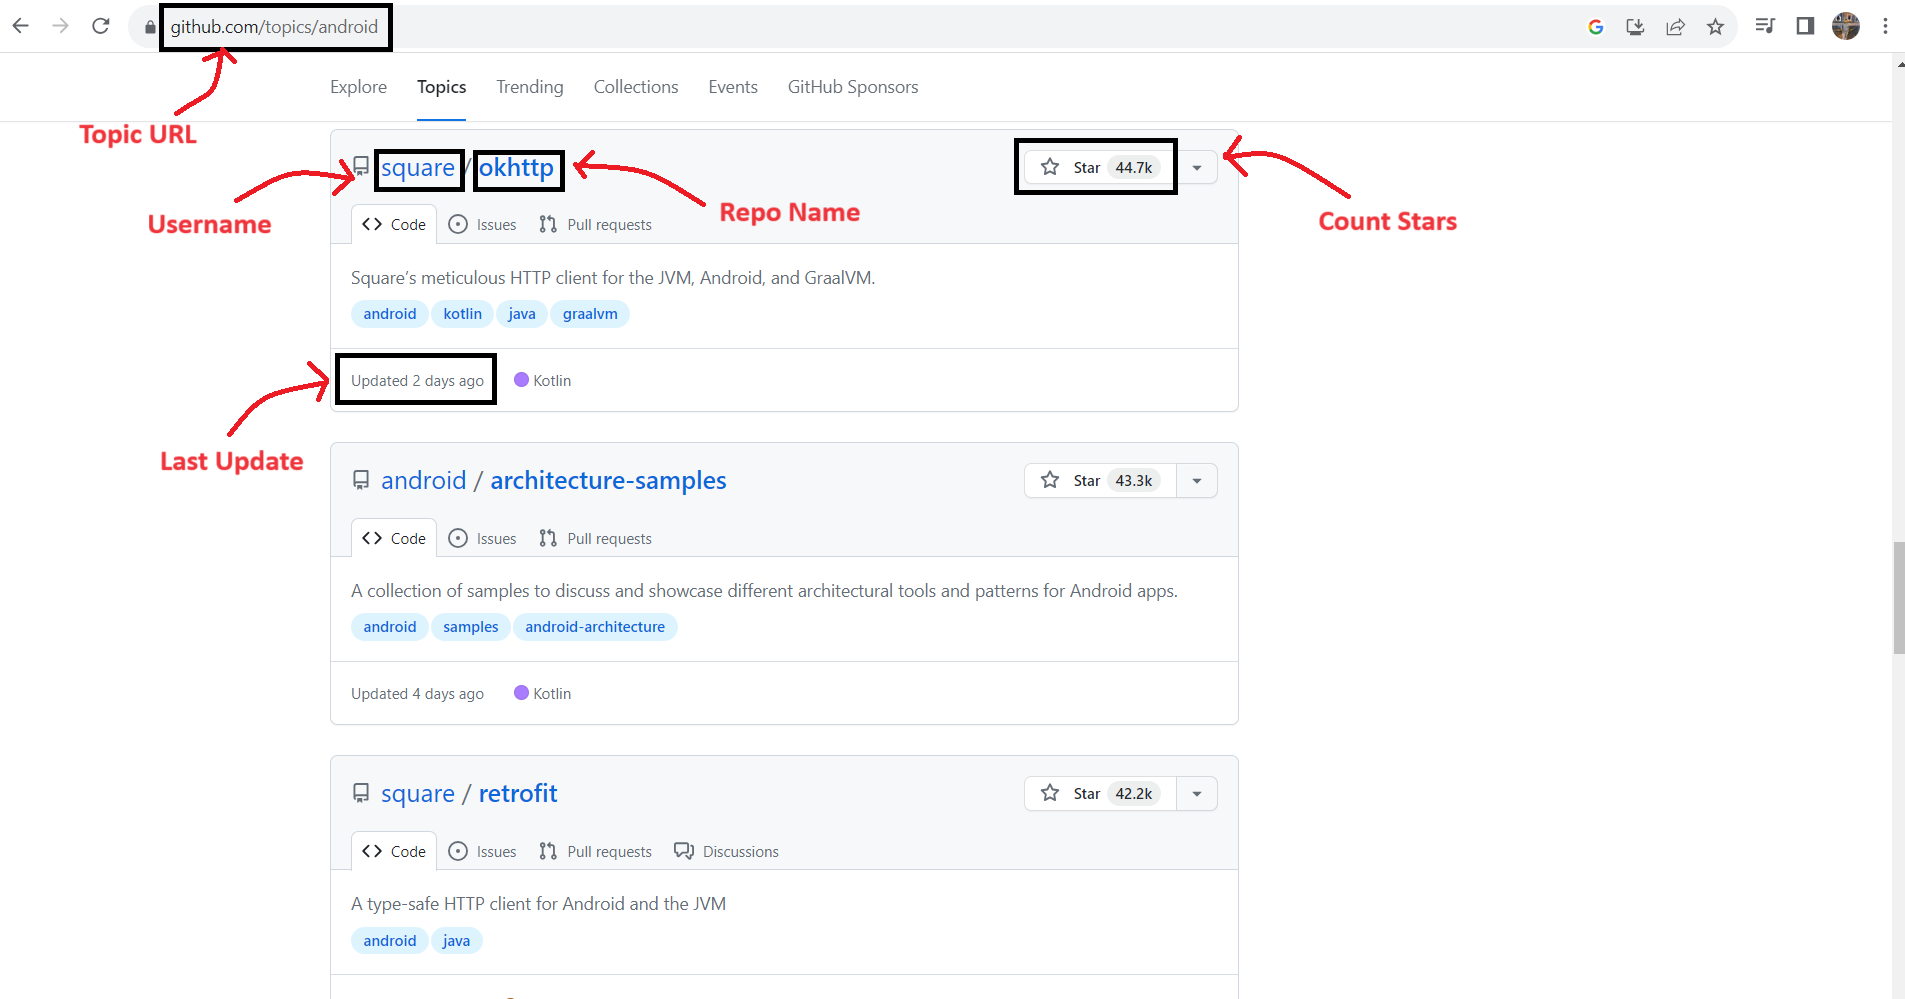

get_topic_page can be used to download topic page:

In [12]:
import os

#Request target page and get info about target webpage
def get_topic_page(topic_url):
  response=requests.get(topic_url)
  if response.status_code!=200:
    raise Exception('Failed to load page {}'.format(topic_url))
  topic_doc=BeautifulSoup(response.text,'html.parser')
  return topic_doc

Similarly we have defined functions for fetching stars, repo information and create data frame

In [13]:
#The function helps to extract count star in integer format
def parse_star_count(st):
  st=st.strip()
  if st[-1]=='k':
      return int(float(st[:-1])*1000)
  return int(st)

In [19]:
#The function helps to fetching all Repository information from target topic
base_url='https://github.com'
def get_repo_info(repo_tag,star_tag,update_tag):
   a_tags=repo_tag.find_all('a')
   username=a_tags[0].text.strip()
   repo_name=a_tags[1].text.strip()
   repo_url=base_url+a_tags[1]['href']
   stars=parse_star_count(star_tag.text.strip())
   date=update_tag.text.strip()
   return username,repo_name ,repo_url,stars,date

In [20]:
#The function helps to create dataframe of all Repository from target topic
def get_topic_repos(topic_doc):
  h3_selection_class='f3 color-fg-muted text-normal lh-condensed'
  repo_tags=topic_doc.find_all('h3',{'class': h3_selection_class})
  star_tags=topic_doc.find_all('span',{'class':'Counter js-social-count'})
  update_tags=topic_doc.find_all('relative-time',{'class':'no-wrap'})

  topic_repos_dict={
          'Username':[],
          'Repo_Name':[],
          'Stars':[],
          'Repo_URL':[],
          'Last Update':[]
      }

  for i in range(len(repo_tags)):
      repo_info=get_repo_info(repo_tags[i], star_tags[i],update_tags[i])
      topic_repos_dict['Username'].append(repo_info[0])
      topic_repos_dict['Repo_Name'].append(repo_info[1])
      topic_repos_dict['Repo_URL'].append(repo_info[2])
      topic_repos_dict['Stars'].append(repo_info[3])
      topic_repos_dict['Last Update'].append(repo_info[4])

  return pd.DataFrame(topic_repos_dict)

In [21]:
#The function helps to checking topic file exist or not
#If not exist get repo dataframe and save into csv file
def scrape_topic(topic_url, path):

    if os.path.exists(path):
          print("The file {} already exists. Skipping...".format(path))
          return
    topic_df = get_topic_repos(get_topic_page(topic_url))
    topic_df.to_csv(path, index=None)

##Putting it all together
We have a funciton to get the list of topics

We have a function to create a CSV file for scraped repos from a topics page

Let's create a function to put them together

In [22]:
#This function helps to create a directory and save all repository csv file into directory
def scrape_topics_repos():
  print('Scraping list of topics')
  topics_df = scrape_topics()
  os.makedirs('all_repo_file', exist_ok=True)
  for index, row in topics_df.iterrows():
      print('Scraping top repositories for "{}"'.format(row['Title']))
      scrape_topic(row['URL'], 'all_repo_file/{}.csv'.format(row['Title']))
      #scrape_topic(row['URL'],row['Title'])

In [23]:
scrape_topics_repos()

Scraping list of topics
Scraping top repositories for "3D"
Scraping top repositories for "Ajax"
Scraping top repositories for "Algorithm"
Scraping top repositories for "Amp"
Scraping top repositories for "Android"
Scraping top repositories for "Angular"
Scraping top repositories for "Ansible"
Scraping top repositories for "API"
Scraping top repositories for "Arduino"
Scraping top repositories for "ASP.NET"
Scraping top repositories for "Atom"
Scraping top repositories for "Awesome Lists"
Scraping top repositories for "Amazon Web Services"
Scraping top repositories for "Azure"
Scraping top repositories for "Babel"
Scraping top repositories for "Bash"
Scraping top repositories for "Bitcoin"
Scraping top repositories for "Bootstrap"
Scraping top repositories for "Bot"
Scraping top repositories for "C"
Scraping top repositories for "Chrome"
Scraping top repositories for "Chrome extension"
Scraping top repositories for "Command line interface"
Scraping top repositories for "Clojure"
Scrapin